In [676]:
import pandas as pd

# importing all sheets from the two files to two dictionaries (with sheet names as keys)

# cases data source:
# https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/statistik-och-analyser/bekraftade-fall-i-sverige/
cases_sheets = pd.read_excel("../../Data/Lab-Data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name=None)

# vaccination data source:
# https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/statistik-och-analyser/statistik-over-registrerade-vaccinationer-covid-19/
vac_sheets = pd.read_excel("../../Data/Lab-Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name=None)

# Uppgift 1

In [677]:
df_weeks = cases_sheets["Veckodata Riket"]
df_weeks.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


## a) Initial data analysis

In [678]:
df_weeks.shape, df_weeks.columns, df_weeks.index

((142, 13),
 Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
        'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
        'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
        'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
        'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
       dtype='object'),
 RangeIndex(start=0, stop=142, step=1))

In [679]:
df_weeks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

In [680]:
df_weeks.describe()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2020.957746,26.035211,18378.345070,177.197183,354.169014,1.125288e+06,10843.281690,67.176056,6000.464789,144.936620,14.000000,12321.154930,1187.840841
std,0.797809,14.228835,38569.455753,371.689114,725.677174,9.618084e+05,9265.100705,73.435000,3076.853993,173.659331,16.796551,6103.235009,587.255605
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,3075.000000,30.000000,59.750000,1.014860e+05,982.500000,14.000000,2643.750000,25.250000,2.425000,5880.000000,569.375000
50%,2021.000000,26.000000,5531.000000,53.000000,107.500000,1.085848e+06,10461.500000,27.500000,7559.500000,77.500000,7.450000,14610.500000,1407.650024
75%,2022.000000,37.750000,21125.000000,203.500000,421.250000,2.423603e+06,23350.500000,109.000000,8863.250000,185.500000,17.950000,17177.750000,1654.999969
max,2022.000000,53.000000,265043.000000,2554.000000,5024.000000,2.609725e+06,25144.000000,289.000000,9539.000000,664.000000,64.300003,20581.000000,1982.900024


In [681]:
df_weeks.value_counts()

år    veckonummer  Antal_fall_vecka  Antal_fall_100000inv_vecka  Antal_fall_100000inv_14dagar  Kum_antal_fall  Kum_fall_100000inv  Antal_nyaintensivvårdade_vecka  Kum_antal_intensivvårdade  Antal_avlidna_vecka  Antal_avlidna_milj_inv_vecka  Kum_antal_avlidna  Kum_antal_avlidna_milj_inv
2020  6            1                 0                           0                             1               0                   0                               0                          0                    0.000000                      0                  0.000000                      1
2021  50           24485             236                         416                           1260348         12143               66                              8152                       49                   4.700000                      15259              1470.099976                   1
      44           5060              49                          106                           1178586         11355             

## b) 'Week' column

In [682]:
df_weeks["Vecka"] = df_weeks["år"].astype(str) + "v" + df_weeks["veckonummer"].astype(str)

In [683]:
df_weeks.columns

Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv', 'Vecka'],
      dtype='object')

## c-f) Plots

### Seaborn plots

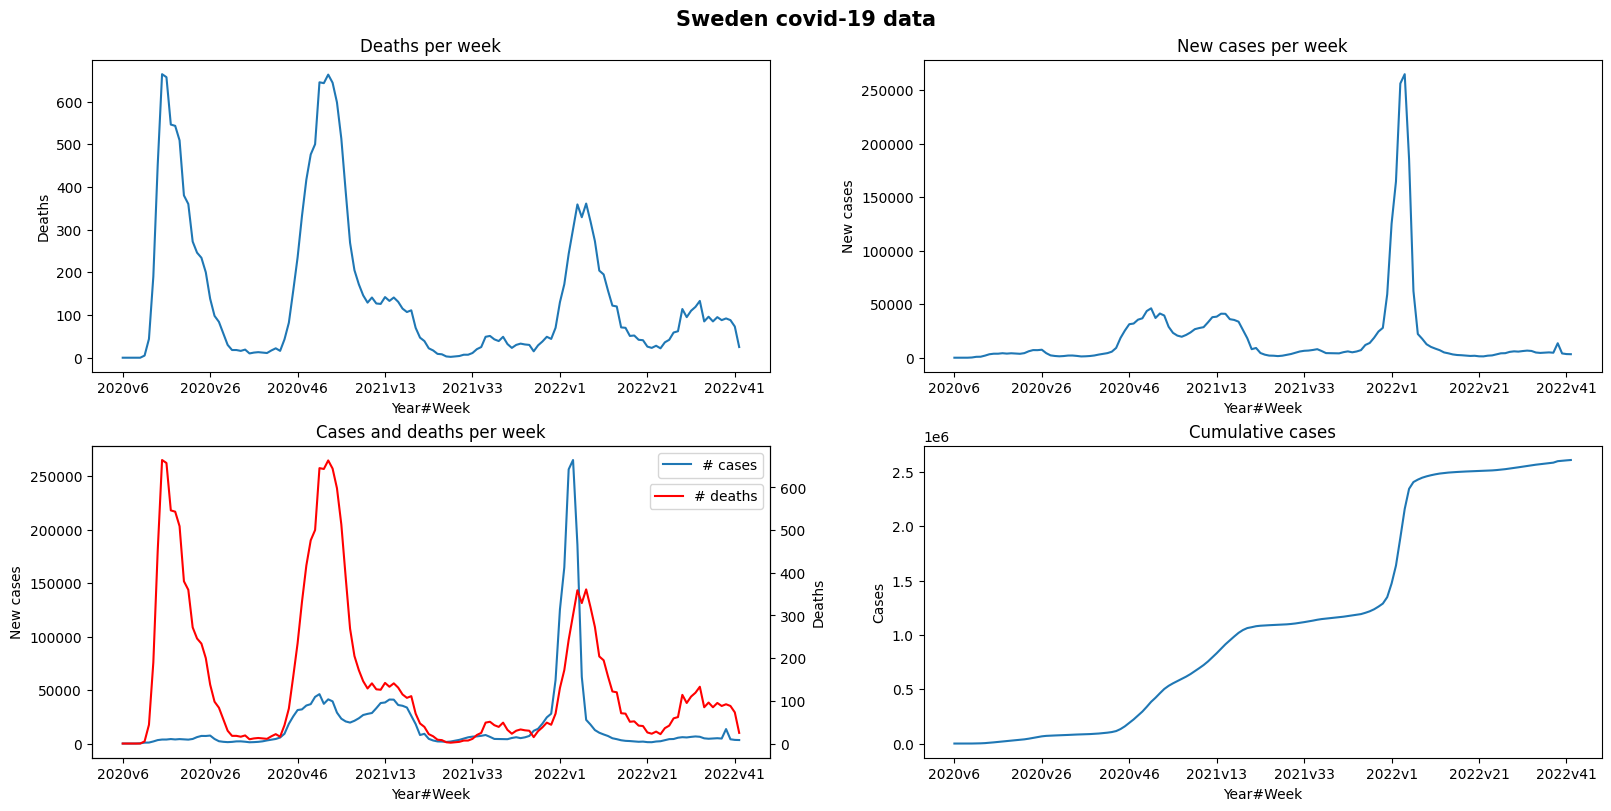

In [684]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2,2, figsize = (16, 8), constrained_layout=True)

titles = {
    "Deaths per week": "Antal_avlidna_vecka",
    "New cases per week": "Antal_fall_vecka",
    "Cases and deaths per week": "Antal_fall_vecka",
    "Cumulative cases": "Kum_antal_fall"
}

labels = ["Deaths", "New cases", "New cases", "Cases"]

# basic plots
for ax, title, label in zip(axes.flatten(), titles, labels):
    sns.lineplot(data=df_weeks, x = "Vecka", y = titles[title], ax=ax)
    ax.set(title = title, ylabel = label, xlabel = "Year#Week")
    ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # Discord #databehandling (Kokchun, 01/11/2022)    

# adding plot of deaths with a separate y axis to axes[1,0]
ax2 = axes[1,0].twinx() # twin y axis (sharing the x axis)
sns.lineplot(data=df_weeks, x = "Vecka", y = "Antal_avlidna_vecka", color = "red", ax=ax2)
ax2.set(ylabel="Deaths")
axes[1,0].legend(labels=["# cases"])
ax2.legend(labels=["# deaths"], bbox_to_anchor=(1,0.9))

fig.suptitle("Sweden covid-19 data", fontsize=15, fontweight="bold")

plt.savefig("./Visualizations/SWE_sns_covid_plots_2x2", facecolor = "white", bbox_inches = "tight")

### Plotly express plots

In [685]:
import plotly_express as px

titles = {
    "Deaths per week": "Antal_avlidna_vecka",
    "New cases per week": "Antal_fall_vecka",
    "Cases and deaths per week": ["Antal_fall_vecka", "Antal_avlidna_vecka"],
    "Cumulative cases": "Kum_antal_fall"
}

labels = ["Deaths", "New cases", "Count", "Cases"]

for title, label in zip(titles, labels):
    fig = px.line(
        df_weeks,
        x="Vecka",
        y=titles[title],
        title = title,
        log_y=isinstance(titles[title], list),
    )
    fig.update_layout(
        hovermode="x",
        xaxis_title="Year#Week",
        yaxis_title=label,
    )
    fig.show()
    fig.write_html("Visualizations/" + "SWE_" + title.replace(" ", "_") + ".html")


# Uppgift 2

In [686]:
df_vac = vac_sheets["Vaccinerade kommun och ålder"]

# a)
print(f"{len(df_vac['Län'].unique())} län are represented")

# b)
print(f"{len(df_vac['Kommun'].unique())} kommuner are represented")

# c)
population_data = df_vac["Befolkning"].sum()
print(f"{population_data} people are represented in the data set")

# d)
population_total = 10502959  # as of August 2022 (source: SCB)
population_data_kids = df_vac.loc[df_vac["Ålder"].isin(["12-15", "16-17"]), "Befolkning"].sum()
print(f"There are {population_total - population_data + population_data_kids} children under the age of 18 in Sweden.")

21 län are represented
290 kommuner are represented
9092790 people are represented in the data set
There are 2155539 children under the age of 18 in Sweden.


In [687]:
# e)
age_groups = df_vac.groupby("Ålder")["Befolkning"].sum()
fig = px.bar(
    age_groups,
    x=age_groups.index,
    y="Befolkning",
    title="Sweden's age distribution",
    labels={"Ålder": "Age group", "Befolkning": "Number of people"},
)

fig.show()
fig.write_html("Visualizations/SWE_age_distribution.html")

In [688]:
# f)
df_shots = pd.DataFrame()
df_shots["1 shot"] = df_vac.groupby("Län_namn")["Andel minst 1 dos"].mean()
df_shots["2 shots"] = df_vac.groupby("Län_namn")["Andel minst 2 doser"].mean()
df_shots["3 shots"] = df_vac.groupby("Län_namn")["Andel 3 doser"].mean()

fig = px.bar(
    df_shots.iloc[:,:3], # only 1, 2, 3 shots (if more added in the future...)
    barmode="group",
    title="Vaccination shots by län",
    labels=dict(variable="# of vaccination shots", value="Fraction of population", Län_namn = "Län"),
)

fig.show()
fig.write_html("Visualizations/SWE_Vaccination_shots_by_lan.html")

In [689]:
df_shots["4 shots"] = df_vac.groupby("Län_namn")["Andel 4 doser"].mean()

fig = px.bar(
    df_shots.loc[['Stockholms län', 'Västra Götalands län']],
    barmode = "group",
    title="Vaccination shots by län",
    labels=dict(variable="# of vaccination shots", value="Fraction of population", Län_namn = "Län"),
)

fig.show()
fig.write_html("Visualizations/SWE_Vaccination_shots_sthml_and_vgota.html")

# Uppgift 3

In [690]:
print(f"{vac_sheets.keys() = }")
print("-"*50)
print(f"{cases_sheets.keys() = }")

vac_sheets.keys() = dict_keys(['Vaccinationer tidsserie', 'Vaccinerade tidsserie', 'Vaccinerade tidsserie dos 3', 'Vaccinerade tidsserie dos 4', 'Vaccinerade tidsserie dos 5', 'Dos 1 till 3 per åldersgrupp', 'Dos 4 per åldersgrupp', 'Dos 4 18+', 'Dos 5 per åldersgrupp', 'Vaccinerade kön', 'Vaccinerade kommun', 'Vaccinerade kommun dos 3', 'Vaccinerade kommun dos 4', 'Vaccinerade kommun dos 5', 'Vaccinerade kommun och ålder', 'FOHM 27 OKT 2022'])
--------------------------------------------------
cases_sheets.keys() = dict_keys(['Antal per dag region', 'Antal avlidna per dag', 'Antal intensivvårdade per dag', 'Totalt antal per region', 'Totalt antal per kön', 'Totalt antal per åldersgrupp', 'Veckodata Region', 'Veckodata Kommun_stadsdel', 'Veckodata Riket', 'FOHM 27 Oct 2022'])


## KPI 1 - Cases by day

Shows the spread of the disease and is important for prognostic purposes.

In [691]:
df_days = cases_sheets["Antal per dag region"]
df_days.head()

,Statistikdatum,Totalt_antal_fall,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
0,2020-02-04,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-02-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [692]:
df_days = df_days[["Statistikdatum", "Totalt_antal_fall"]]
print(df_days.info()) # 996 days

# check that there are no missing dates
df_days.iloc[-1][0] - df_days.iloc[0][0] # delta is 995, so no missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Statistikdatum     996 non-null    datetime64[ns]
 1   Totalt_antal_fall  996 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.7 KB
None


Timedelta('995 days 00:00:00')

In [693]:
fig = px.line(
    df_days,
    x = "Statistikdatum",
    y = "Totalt_antal_fall",
    title = "Cases by day",
    labels = {"Totalt_antal_fall": "Cases", "Statistikdatum": "Date"}
)

fig.update_layout(hovermode = 'x')

fig.write_html("Visualizations/SWE_cases_by_day.html")
fig.show()

## KPI 2 - Case-fatality rate

Policy makers might use this to evaluate the efficacy of interventions and whether they are successfully targeting people most vulnerable to the disease.

However, this evaluation has to take into consideration the rate of testing. If testing only occurs in severe cases, case fatality rate will be high. When rate of testing is increased there will be a decreased case fatality rate, with no actual change in survivability.

In [694]:
df_rate = df_weeks[["Vecka", "Antal_fall_vecka", "Antal_avlidna_vecka"]]
df_rate["Case_fatality_rate"] = (df_rate["Antal_avlidna_vecka"] / df_rate["Antal_fall_vecka"])
df_rate.describe()

/var/folders/j4/c638b8_s4256j6pd5ntzq7540000gn/T/ipykernel_15084/161909657.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Antal_fall_vecka,Antal_avlidna_vecka,Case_fatality_rate
count,142.000000,142.000000,140.000000
mean,18378.345070,144.936620,0.019466
std,38569.455753,173.659331,0.031992
min,0.000000,0.000000,0.000000
25%,3075.000000,25.250000,0.004266
50%,5531.000000,77.500000,0.009425
75%,21125.000000,185.500000,0.020300
max,265043.000000,664.000000,0.177540


In [695]:
fig = px.bar(
    df_rate,
    x = "Vecka",
    y = "Case_fatality_rate",
    title = "Case fatality rate",
    labels = {"Case_fatality_rate": "Fatalities/Cases", "Vecka": "Week"}
)

fig.update_layout(hovermode = "x")
fig.write_html("Visualizations/SWE_Case_fatality_rate.html")
fig.show()

## KPI 3 - Case-fatality rate by age bracket

Provides information about whether certain age groups should be targeted for interventions, and follow-up data allows for evaluation of those interventions.

In [696]:
df_age = cases_sheets["Totalt antal per åldersgrupp"]
df_age

,Åldersgrupp,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
0,Ålder_0_9,138071,109,17
1,Ålder_10_19,355823,101,9
2,Ålder_20_29,418506,285,41
3,Ålder_30_39,493443,492,71
4,Ålder_40_49,474702,997,172
5,Ålder_50_59,378468,1932,523
6,Ålder_60_69,180079,2595,1422
7,Ålder_70_79,87096,2394,4654
8,Ålder_80_89,58170,612,8326
9,Ålder_90_plus,26677,21,5420


In [697]:
# drop data missing age information
df_age = df_age.set_index("Åldersgrupp").drop("Uppgift saknas").reset_index()

df_age["Case_fatality_rate"] = df_age["Totalt_antal_avlidna"] / df_age["Totalt_antal_fall"]

In [698]:
# clean up age values
df_age["Åldersgrupp"] = df_age["Åldersgrupp"].str.replace("Ålder_", "")
df_age["Åldersgrupp"] = df_age["Åldersgrupp"].str.replace("_", "-")
df_age["Åldersgrupp"] = df_age["Åldersgrupp"].str.replace("-plus", "+")
df_age

,Åldersgrupp,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna,Case_fatality_rate
0,0-9,138071,109,17,0.000123
1,10-19,355823,101,9,0.000025
2,20-29,418506,285,41,0.000098
3,30-39,493443,492,71,0.000144
4,40-49,474702,997,172,0.000362
5,50-59,378468,1932,523,0.001382
6,60-69,180079,2595,1422,0.007897
7,70-79,87096,2394,4654,0.053435
8,80-89,58170,612,8326,0.143132
9,90+,26677,21,5420,0.203171


In [699]:
fig = px.bar(
    df_age,
    x = "Åldersgrupp",
    y = "Case_fatality_rate",
    title = "Age and fatality rates",
    labels = {"Åldersgrupp": "Age bracket", "Case_fatality_rate": "Case fatality rate"}
)

fig.update_layout(hovermode = "x")
fig.write_html("Visualizations/SWE_age_and_fatality_rates.html")
fig.show()

## KPI 4 - Vaccination coverage by age bracket

Should correlate with the case fatality rate by age group.

In [700]:
df_vac.groupby("Ålder")["Antal minst 1 dos"].sum() / df_vac.groupby("Ålder")["Befolkning"].sum()

Ålder
12-15             0.552576
16-17             0.774521
18-29             0.814099
30-39             0.810910
40-49             0.860960
50-59             0.903712
60-69             0.930600
70-79             0.958695
80-89             0.967632
90 eller äldre    0.960382
dtype: float64

In [701]:
# get proportion of population that got each shot per age group
col_list = [
    df_vac.groupby("Ålder")["Antal minst 1 dos"].sum()
    / df_vac.groupby("Ålder")["Befolkning"].sum(),
    df_vac.groupby("Ålder")["Antal minst 2 doser"].sum()
    / df_vac.groupby("Ålder")["Befolkning"].sum(),
    df_vac.groupby("Ålder")["Antal 3 doser"].sum()
    / df_vac.groupby("Ålder")["Befolkning"].sum(),
    df_vac.groupby("Ålder")["Antal 4 doser"].sum()
    / df_vac.groupby("Ålder")["Befolkning"].sum()
]

df_vac_age = pd.DataFrame(col_list, index = ["1 shot", "2 shots", "3 shots", "4 shots"]).T
df_vac_age

,1 shot,2 shots,3 shots,4 shots
Ålder,,,,
12-15,0.552576,0.507196,0.000000,0.000000
16-17,0.774521,0.726508,0.000000,0.000000
18-29,0.814099,0.775702,0.388585,0.000000
30-39,0.810910,0.782491,0.469918,0.000000
40-49,0.860960,0.844140,0.609556,0.000000
50-59,0.903712,0.893728,0.746795,0.000000
60-69,0.930600,0.923447,0.846234,0.000000
70-79,0.958695,0.954153,0.921432,0.801892
80-89,0.967632,0.964342,0.942424,0.863475


In [702]:
fig = px.bar(
    df_vac_age,
    barmode = "group",
    title = "Vaccination coverage by age bracket",
    labels = {"variable": "# of shots", "value": "Fraction of population", "Ålder": "Age bracket"}
)
fig.write_html("Visualizations/SWE_coverage_by_age.html")
fig.show()

## KPI 5 - Sex differences

Is there similar vaccine coverage between the sexes?

Are there sex differences in perception of COVID-19 risk and vaccine skepticism? If so, sex should be taken into consideration when designing vaccination and information outreach campaigns. Ultimately, coverage should be similar.

In [726]:
df_sex = vac_sheets["Vaccinerade kön"]
df_sex

,Kön,Antal vaccinerade,Andel vaccinerade,Vaccinationsstatus
0,Totalt,7810380,0.858964,Minst 1 dos
1,Totalt,7627588,0.838861,Minst 2 doser
2,Män,3858688,0.845743,Minst 1 dos
3,Män,3759898,0.824090,Minst 2 doser
4,Kvinnor,3951692,0.872279,Minst 1 dos
5,Kvinnor,3867690,0.853737,Minst 2 doser


In [727]:
df_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Kön                 6 non-null      object 
 1   Antal vaccinerade   6 non-null      int64  
 2   Andel vaccinerade   6 non-null      float64
 3   Vaccinationsstatus  6 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 320.0+ bytes


In [728]:
col1 = df_sex.loc[df_sex["Vaccinationsstatus"] == "Minst 1 dos", ["Kön", "Andel vaccinerade"]]
col2 = df_sex.loc[df_sex["Vaccinationsstatus"] == "Minst 2 doser", ["Kön", "Andel vaccinerade"]]
df_sex = pd.merge(col1, col2, on = "Kön").loc[1:]
df_sex = df_sex.rename({"Andel vaccinerade_x": "1 shot", "Andel vaccinerade_y": "2 shots"}, axis = 1)
df_sex

,Kön,1 shot,2 shots
1,Män,0.845743,0.824090
2,Kvinnor,0.872279,0.853737


In [735]:
fig = px.bar(
    df_sex,
    x = "Kön",
    y = ["1 shot", "2 shots"],
    barmode = "group"
)

fig.show()